## TDLR:EDA

Before diving into the model I wanted to dig the data in order have enough insights about how to approach the problem and understand which information I can gain from this dataset.<br>

<li>As a first step,I wanted to check correlations between features. The results did not surprise me I was expecting that num_children and children_per_adult features are highly correlated to each other. 
<li>I have also checked the distribution of distances. As seen in the graphs most of the vacations are planned within 5000kms.
<li> I needed to analyze the data on deeper levels. But unfortunately I did not have enough time for extra vvisualizations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [3]:
df=pd.read_csv('user_features.csv', header=0,  quotechar='"', error_bad_lines=False)

In [4]:
df.head()

,user_id,num_adults,num_children,vac_duration,book_vac_duration,book_days_ago,child_per_adult,vac_distance1,vac_distance2,origin_lat,...,origin_YMQ,origin_YOW,origin_YTO,origin_YUL,origin_YVR,origin_YWG,origin_YYC,origin_YYZ,origin_ZRH,user_id.1
0,000069,2.0,3.0,16.0,10.0,1184.0,1.5,1548.008799,1548.875108,200.32,...,0,0,0,0,0,0,0,0,0,000069
1,00019d,4.0,0.0,28.0,139.0,1185.0,0.0,7932.127859,7951.952030,97.70,...,0,0,0,0,0,0,0,0,0,00019d
2,0002e3,1.0,0.0,0.0,6.0,1189.0,0.0,2107.313051,2104.104322,97.70,...,0,0,0,0,0,0,0,0,0,0002e3
3,000332,1.5,0.0,29.0,41.0,1186.0,0.0,2731.559030,2727.630372,652.34,...,0,0,0,0,0,0,0,0,0,000332
4,0004e1,1.0,0.0,6.0,80.0,1185.0,0.0,709.283337,709.657571,192.98,...,0,0,0,0,0,0,0,0,0,0004e1


In [5]:
colors = ['#41BA76','#80dfff','#E8E359','#df9f9f','#CAB4D2', '#6EAFE1', '#C96DA8']

## Corelations

In [13]:
cols=list(df.columns)
filtered=[col for col in cols if not col.startswith('destination') and not col.startswith('origin')]
df_corr=df[filtered]

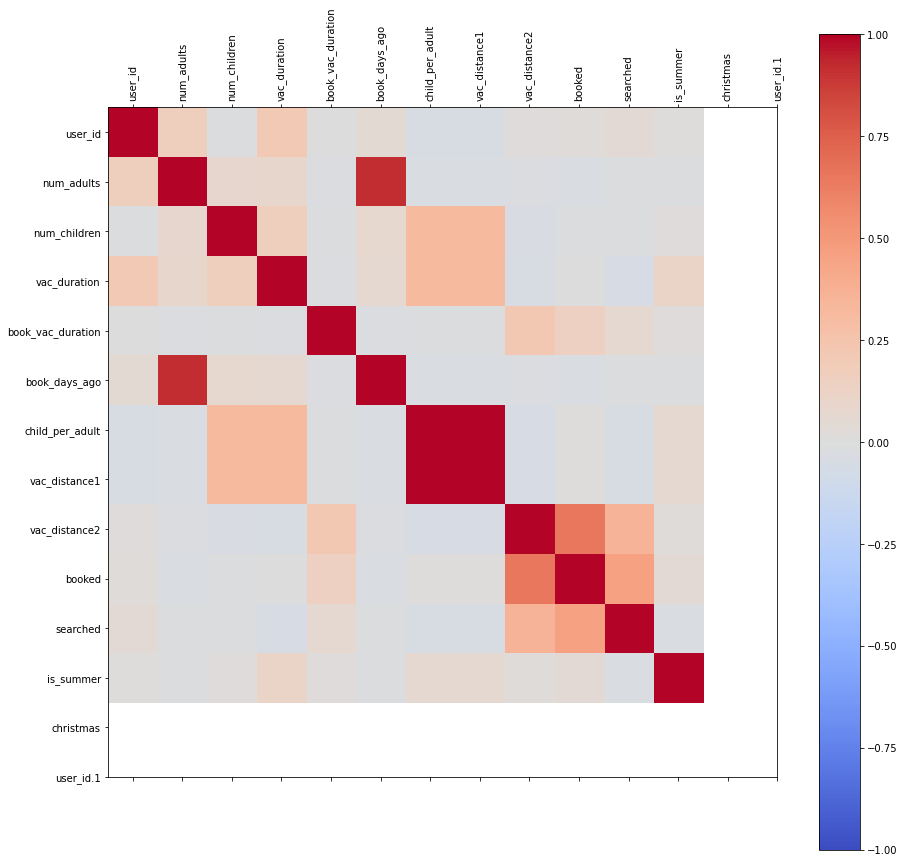

In [14]:
corr = df_corr.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

In [15]:
#Calculating highly correlated columns based on correlation matrix's upper corner
corr_matrix = df_corr.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.90)]
high_corr

['child_per_adult', 'vac_distance2']

<AxesSubplot:xlabel='vac_distance1'>

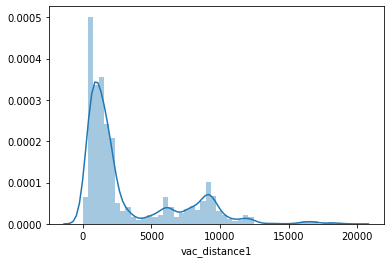

In [16]:
#Distrubition of distances in bookings and searchings
sns.distplot(df.vac_distance1)

<AxesSubplot:xlabel='vac_distance2'>

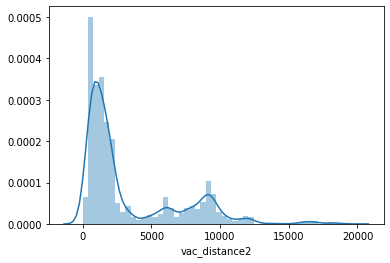

In [17]:
#Distrubition of distances in bookings and searchings
sns.distplot(df.vac_distance2)